In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cfit

In [2]:
def r2(y, ymodel):
    yMean = np.mean(y)
    SSres = np.sum( (y - ymodel)**2 )
    SStot = np.sum( (y - yMean)**2 )
    return 1 - SSres/SStot

In [3]:
def linear(x, m, b):
    return m*x + b

def exp_neg(T, Eg, A):
    kb = 1 #eV⋅K−1 
    eta = 1 #é 1 ou 2
    return A * np.exp(-Eg / (eta * kb * T))

def newlinear(x, R0, alpha): #x é (T - T0)
    return R0 * (1 + alpha*x)

In [4]:
dadosH = pd.read_csv("Dados/heating.csv", delimiter="\t")
dadosH.loc[:36,"I_diodo(nA)"] = 1000*dadosH.loc[:36, "I_diodo(nA)"]
dadosC = pd.read_csv("Dados/cooling.csv", delimiter="\t")

Logo durante o registo dos dados, percebeu-se que os primeiros pontos em regime de arrefecimento estavam ainda em aquecimento. É possível ver isso graficamente, pois os pontos com temperatura mais alta
saiem claramente da tendência. Por isso, irão ser descartados os primeiros 5 pontos

In [5]:
T_H = np.array(dadosH.loc[:,"T(C)"]) + 273.15 #agora em Kelvin
Rc_H = np.array(dadosH.loc[:,"R_c(Ohm)"])
Id_H = np.array(dadosH.loc[:,"I_diodo(nA)"]) - 7 #7 nanoA de corrente residual

T_C = np.array(dadosC.loc[5:,"T(C)"]) + 273.15 #agora em Kelvin
Rc_C = np.array(dadosC.loc[5:,"R_c(Ohm)"])
Id_C = np.array(dadosC.loc[5:,"I_d(nA)"]) - 7 #7 nanoA de corrente residual

In [6]:
#p é os parametros, c é a matriz das covariancias

pRc_H, cRc_H = cfit(linear, T_H, Rc_H)
r2_RH = r2(Rc_H, linear(T_H, pRc_H[0], pRc_H[1]))
uRc_H = np.array([cRc_H[0,0]**(1/2),cRc_H[1,1]**(1/2)])*3

pId_H, cId_H = cfit(exp_neg, T_H, Id_H)
r2_IH = r2(Id_H, exp_neg(T_H, pId_H[0], pId_H[1]))
uId_H = np.array([cId_H[0,0]**(1/2),cId_H[1,1]**(1/2)])*3

print(pRc_H, r2_RH)
print(uRc_H, "\n" )

print(pId_H, r2_IH)
print(uId_H)



[  0.35447513 -12.06938322] 0.9998845748466424
[0.00136563 0.44801629] 

[7.39689031e+03 2.51692907e+11] 0.998921352039926
[1.32610008e+02 9.66502004e+10]


## Em aquecimento
### 1 - Fio de cobre 
### 2 - Díodo 

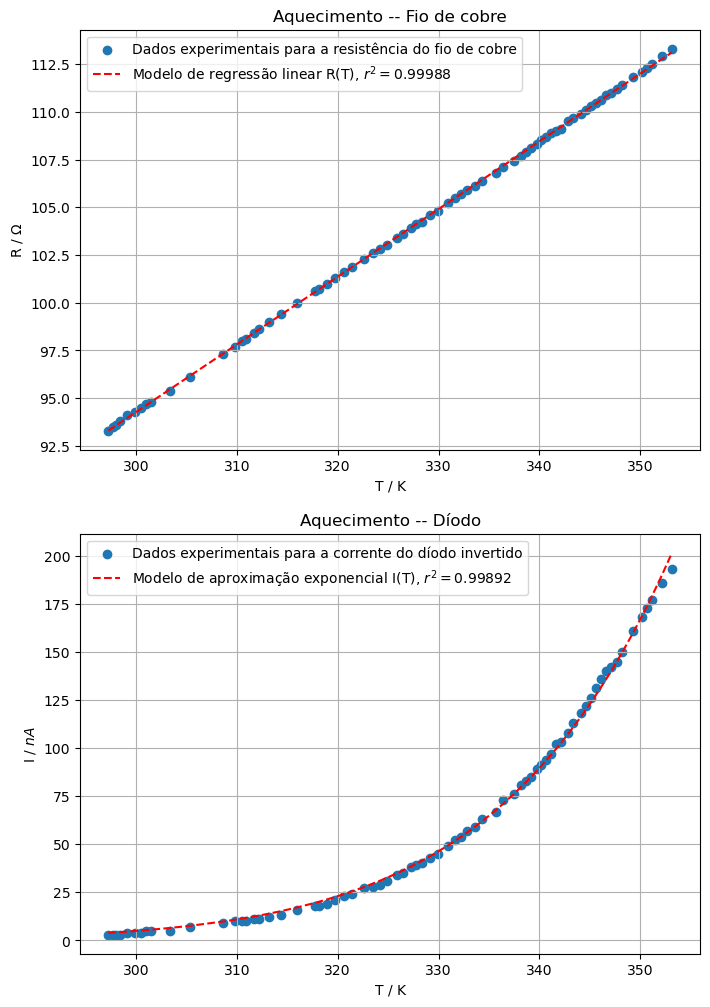

In [7]:
fig,ax = plt.subplots(2,1, figsize = (8,12))



ax[0].scatter(T_H, Rc_H, label = 'Dados experimentais para a resistência do fio de cobre')
ax[0].plot(T_H, linear(T_H, pRc_H[0], pRc_H[1]), color = 'red', label = r'Modelo de regressão linear R(T), $r^2 = {:.5}$'.format(r2_RH), ls = '--')

ax[0].set_xlabel('T / K')
ax[0].set_ylabel(r'R / $\Omega$')
ax[0].grid()
ax[0].legend()
ax[0].set_title('Aquecimento -- Fio de cobre')


ax[1].scatter(T_H,Id_H, label = 'Dados experimentais para a corrente do díodo invertido')
ax[1].plot(T_H, exp_neg(T_H, pId_H[0], pId_H[1]), color = 'red', label = r'Modelo de aproximação exponencial I(T), $r^2 = {:.5}$'.format(r2_IH), ls = '--')

ax[1].set_xlabel('T / K')
ax[1].set_ylabel(r'I / $nA$')
ax[1].grid()
ax[1].legend()
ax[1].set_title('Aquecimento -- Díodo')

plt.show()

## Em arrefecimento
### 1 - Fio de cobre 
### 2 - Díodo 

Em arrefencimento, logo durante o registo da experiência, percebeu-se que os primeiros dados registados ainda estavam bastante instáveis, como se estivessem em regime de aquecimento.
Por isso, vai-se eliminar os primeiros 4 pontos. Após o quarto ponto, vê-se graficamente que os pontos estão no mesmo regime que todos os seguintes.

In [8]:
pRc_C, cRc_C = cfit(linear, T_C[4:], Rc_C[4:])
r2_RC = r2(Rc_C, linear(T_C, pRc_C[0], pRc_C[1]))
uRc_C = np.array([cRc_C[0,0]**(1/2),cRc_C[1,1]**(1/2)])*3

pId_C, cId_C = cfit(exp_neg, T_C[4:], Id_C[4:])
r2_IC = r2(Id_C, exp_neg(T_C, pId_C[0], pId_C[1]))
uId_C = np.array([cId_C[0,0]**(1/2),cId_C[1,1]**(1/2)])*3

print(pRc_C, r2_RC)
print(uRc_C, "\n" )

print(pId_C, r2_IC)
print(uId_C)


[  0.35858427 -12.54200513] 0.9996768062021053
[0.00175912 0.57901412] 

[7.69973629e+03 5.19585257e+11] 0.9995445150737887
[6.01106647e+01 9.06909329e+10]


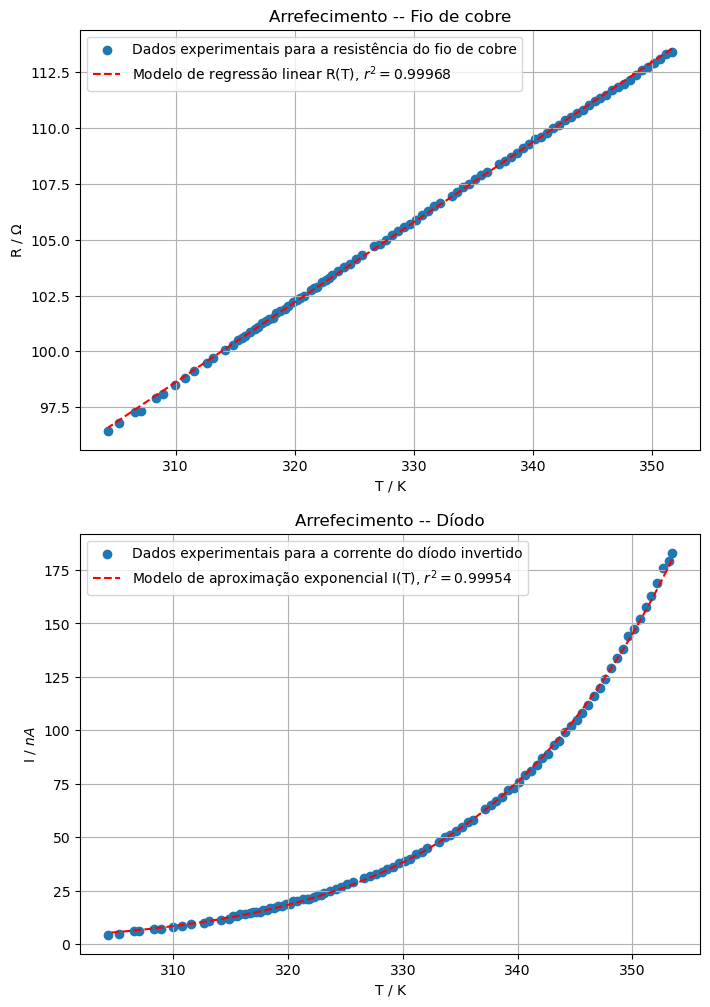

In [17]:
fig,ax = plt.subplots(2,1, figsize = (8,12))



ax[0].scatter(T_C[4:], Rc_C[4:], label = 'Dados experimentais para a resistência do fio de cobre')
ax[0].plot(T_C[4:], linear(T_C[4:], pRc_C[0], pRc_C[1]), color = 'red', label = r'Modelo de regressão linear R(T), $r^2 = {:.5}$'.format(r2_RC), ls = '--')

ax[0].set_xlabel('T / K')
ax[0].set_ylabel(r'R / $\Omega$')
ax[0].grid()
ax[0].legend()
ax[0].set_title('Arrefecimento -- Fio de cobre')


ax[1].scatter(T_C,Id_C, label = 'Dados experimentais para a corrente do díodo invertido')
ax[1].plot(T_C, exp_neg(T_C, pId_C[0], pId_C[1]), color = 'red', label = r'Modelo de aproximação exponencial I(T), $r^2 = {:.5}$'.format(r2_IC), ls = '--')

ax[1].set_xlabel('T / K')
ax[1].set_ylabel(r'I / $n A$')
ax[1].grid()
ax[1].legend()
ax[1].set_title('Arrefecimento -- Díodo')

plt.show()

Pensa-se em linearizar a eq. para a corrente no díodo - tomar $\log$ em ambos os membros

Obtém-se: 

### $$\log(\frac{I_d}{1 n A}) = \frac{A}{1 n A} - \frac{E_g}{\eta k_b T}$$

In [10]:
def inverse(T, A, Eg):
    return A - Eg/T #kb = 1

logId_C = np.log(Id_C)
logId_H = np.log(Id_H)

plogId_H, clogId_H = cfit(inverse, T_H, logId_H)
r2_logIH = r2(logId_H, inverse(T_H, plogId_H[0], plogId_H[1]))

plogId_C, clogId_C = cfit(inverse, T_C, logId_C)
r2_logIC = r2(logId_C, inverse(T_C, plogId_C[0], plogId_C[1]))

print(plogId_H, r2_logIH)
#print(uRc_H, "\n" )

print(plogId_C, r2_logIC)
#print(uId_H)


[  27.70153867 7889.41823006] 0.9985325312040014
[  27.26575292 7795.5819815 ] 0.9988260159411924


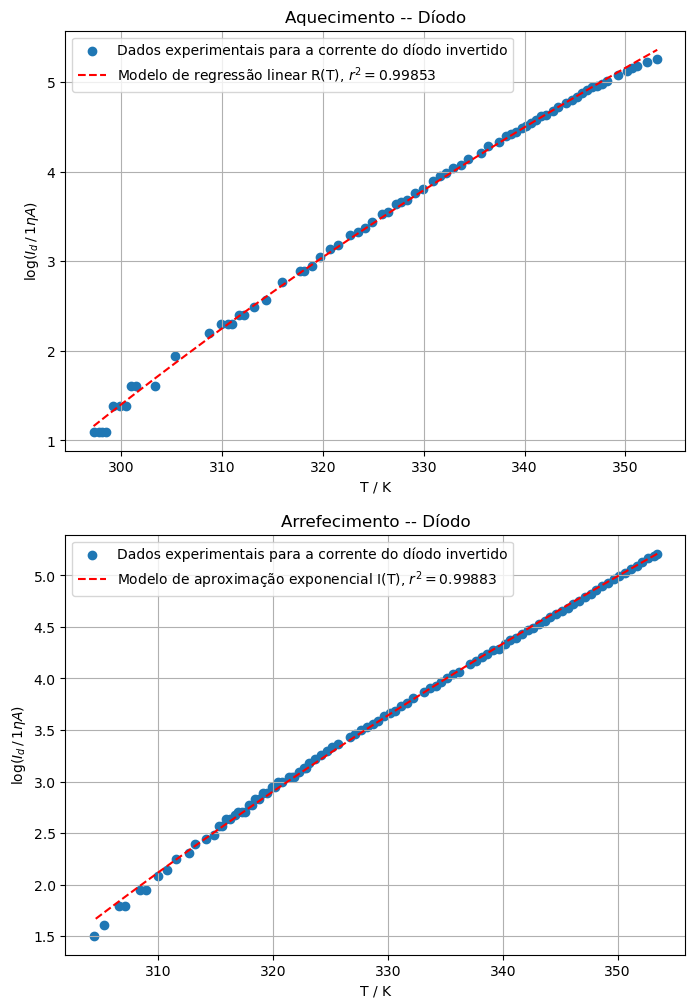

In [11]:
fig,ax = plt.subplots(2,1, figsize = (8,12))



ax[0].scatter(T_H, logId_H, label = 'Dados experimentais para a corrente do díodo invertido')
ax[0].plot(T_H, inverse(T_H, plogId_H[0], plogId_H[1]), color = 'red', label = r'Modelo de regressão linear R(T), $r^2 = {:.5}$'.format(r2_logIH), ls = '--')

ax[0].set_xlabel('T / K')
ax[0].set_ylabel(r'$\log(I_d \, / \, 1\eta A)$')
ax[0].grid()
ax[0].legend()
ax[0].set_title('Aquecimento -- Díodo')


ax[1].scatter(T_C,logId_C, label = 'Dados experimentais para a corrente do díodo invertido')
ax[1].plot(T_C, inverse(T_C, plogId_C[0], plogId_C[1]), color = 'red', label = r'Modelo de aproximação exponencial I(T), $r^2 = {:.5}$'.format(r2_logIC), ls = '--')

ax[1].set_xlabel('T / K')
ax[1].set_ylabel(r'$\log(I_d \, / \, 1\eta A)$')
ax[1].grid()
ax[1].legend()
ax[1].set_title('Arrefecimento -- Díodo')

plt.show()

Para realmente linearizar a eq. vai-se fazer uma mudança de variável:
#### $$x = 1/T$$
Desta forma, fica-se com uma expressão do tipo 
#### $$ y = b-mx$$
em que $y = \ln(I_d)$, $m = \frac{E_g}{k_b}$ e $x = 1/T$.

In [12]:
Tinv_H = T_H**(-1)
Tinv_C = T_C**(-1)

In [13]:
ploginvId_H, cloginvId_H = cfit(linear, Tinv_H, logId_H)
r2_loginvIH = r2(logId_H, linear(Tinv_H, ploginvId_H[0], ploginvId_H[1]))
uloginvId_H = np.array([cloginvId_H[0,0]**(1/2),cloginvId_H[1,1]**(1/2)])*3

ploginvId_C, cloginvId_C = cfit(linear, Tinv_C, logId_C)
r2_loginvIC = r2(logId_C, linear(Tinv_C, ploginvId_C[0], ploginvId_C[1]))
uloginvId_C = np.array([cloginvId_C[0,0]**(1/2),cloginvId_C[1,1]**(1/2)])*3

print(ploginvId_H, r2_logIH)
print(uloginvId_H, "\n" )

print(ploginvId_C, r2_logIC)
print(uloginvId_C)

[-7889.4182329     27.70153868] 0.9985325312040014
[108.44774961   0.33230023] 

[-7795.58197561    27.2657529 ] 0.9988260159411924
[82.69743596  0.25131829]


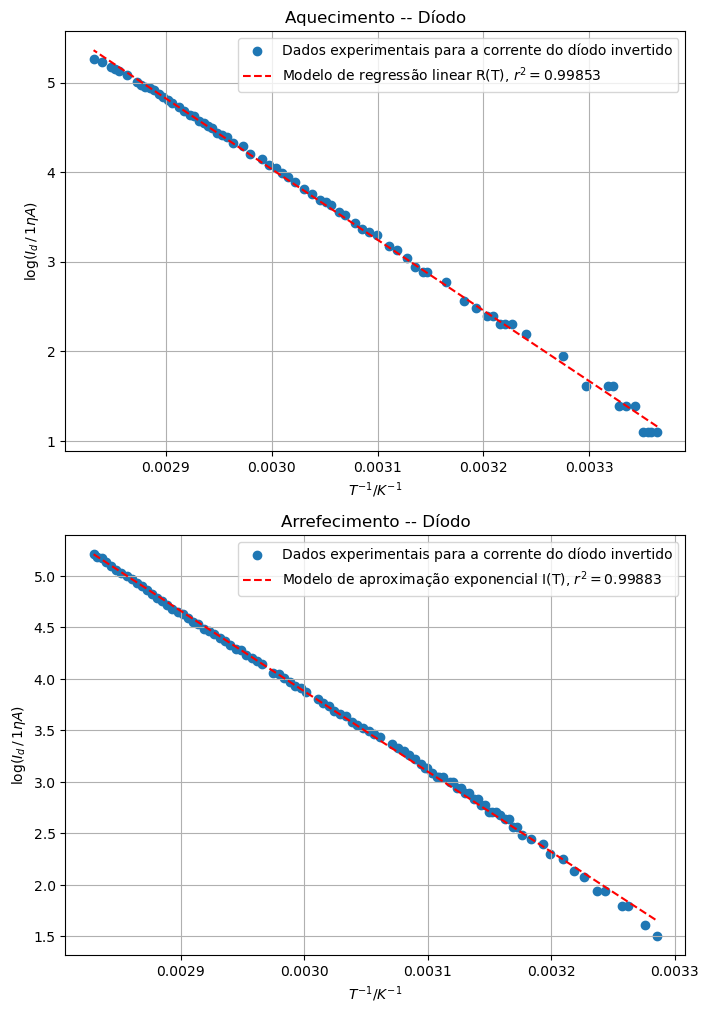

In [14]:
fig,ax = plt.subplots(2,1, figsize = (8,12))



ax[0].scatter(Tinv_H, logId_H, label = 'Dados experimentais para a corrente do díodo invertido')
ax[0].plot(Tinv_H, linear(Tinv_H, ploginvId_H[0], ploginvId_H[1]), color = 'red', label = r'Modelo de regressão linear R(T), $r^2 = {:.5}$'.format(r2_loginvIH), ls = '--')

ax[0].set_xlabel(r'$T^{-1} / K^{-1}$')
ax[0].set_ylabel(r'$\log(I_d \, / \, 1\eta A)$')
ax[0].grid()
ax[0].legend()
ax[0].set_title('Aquecimento -- Díodo')


ax[1].scatter(Tinv_C,logId_C, label = 'Dados experimentais para a corrente do díodo invertido')
ax[1].plot(Tinv_C, linear(Tinv_C, ploginvId_C[0], ploginvId_C[1]), color = 'red', label = r'Modelo de aproximação exponencial I(T), $r^2 = {:.5}$'.format(r2_loginvIC), ls = '--')

ax[1].set_xlabel(r'$T^{-1} / K^{-1}$')
ax[1].set_ylabel(r'$\log(I_d \, / \, 1\eta A)$')
ax[1].grid()
ax[1].legend()
ax[1].set_title('Arrefecimento -- Díodo')

plt.show()

## Outro método pro fio de cobre

Aqui uso a variável $(T-T_0)$ e um modelo ajustado (*newlinear* definido no início do doc) ao nosso contexto para que $\alpha$ e $E_g$ saiam diretamente das incertezas

É menos trabalho 🙏

In [15]:
#p é os parametros, c é a matriz das covariancias

new_T_H = T_H-T_H[0]
new_pRc_H, new_cRc_H = cfit(newlinear, new_T_H, Rc_H)
new_r2_RH = r2(Rc_H, newlinear(new_T_H, new_pRc_H[0], new_pRc_H[1]))
new_uRc_H = np.array([new_cRc_H[0,0]**(1/2),new_cRc_H[1,1]**(1/2)])*3

print(new_pRc_H, new_r2_RH)
print(new_uRc_H, "\n" )


new_T_C = T_C-T_C[0]
new_pRc_C, new_cRc_C = cfit(newlinear, new_T_C, Rc_C)
new_r2_RC = r2(Rc_C, newlinear(new_T_C, new_pRc_C[0], new_pRc_C[1]))
new_uRc_C = np.array([new_cRc_C[0,0]**(1/2),new_cRc_C[1,1]**(1/2)])*3

print(new_pRc_C, new_r2_RC)
print(new_uRc_C, "\n" )

[9.32983496e+01 3.79937194e-03] 0.9998845748466424
[4.72881728e-02 1.63536665e-05] 

[1.14159054e+02 3.12984180e-03] 0.9996942201605825
[5.25807105e-02 1.57051927e-05] 



Text(0.5, 1.0, 'Arrefecimento -- Fio de cobre')

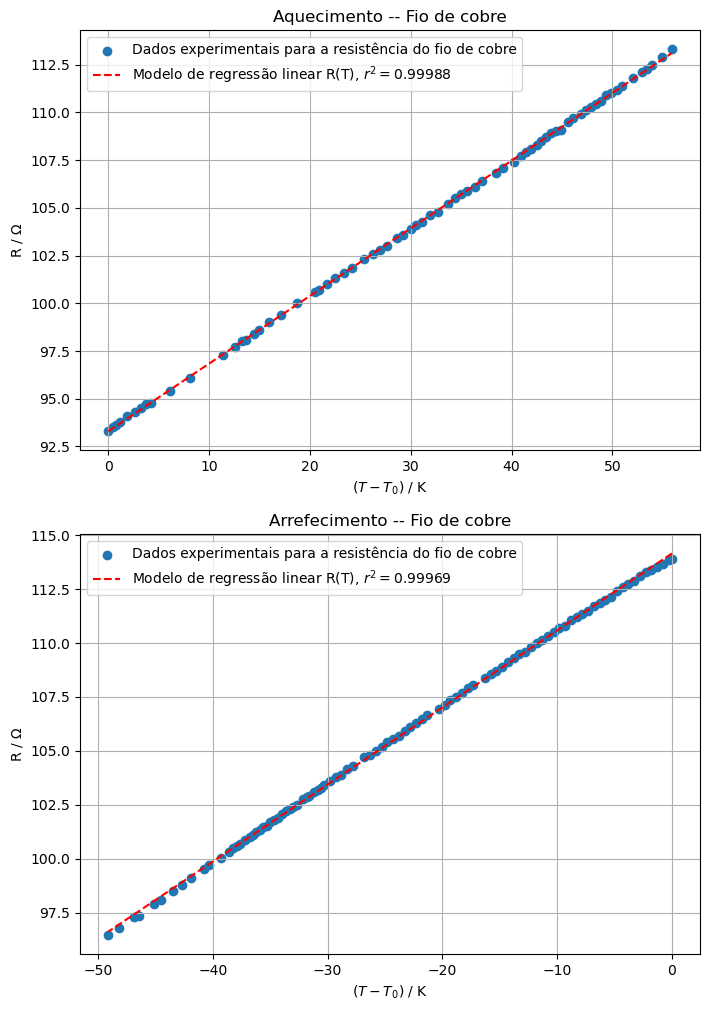

In [16]:
fig,ax = plt.subplots(2,1, figsize = (8,12))


ax[0].scatter(new_T_H, Rc_H, label = 'Dados experimentais para a resistência do fio de cobre')
ax[0].plot(new_T_H, newlinear(new_T_H, new_pRc_H[0], new_pRc_H[1]), color = 'red', label = r'Modelo de regressão linear R(T), $r^2 = {:.5}$'.format(new_r2_RH), ls = '--')

ax[0].set_xlabel(r'$(T - T_0)$ / K')
ax[0].set_ylabel(r'R / $\Omega$')
ax[0].grid()
ax[0].legend()
ax[0].set_title('Aquecimento -- Fio de cobre')



ax[1].scatter(new_T_C, Rc_C, label = 'Dados experimentais para a resistência do fio de cobre')
ax[1].plot(new_T_C, newlinear(new_T_C, new_pRc_C[0], new_pRc_C[1]), color = 'red', label = r'Modelo de regressão linear R(T), $r^2 = {:.5}$'.format(new_r2_RC), ls = '--')

ax[1].set_xlabel(r'$(T - T_0)$ / K')
ax[1].set_ylabel(r'R / $\Omega$')
ax[1].grid()
ax[1].legend()
ax[1].set_title('Arrefecimento -- Fio de cobre')